In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')

In [4]:
features = ['Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']

In [6]:
# dropna cause clusturing dont work well with null values
df_train = df_train.dropna(subset=features)

data = df_train[features].copy()

In [8]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

<Axes: >

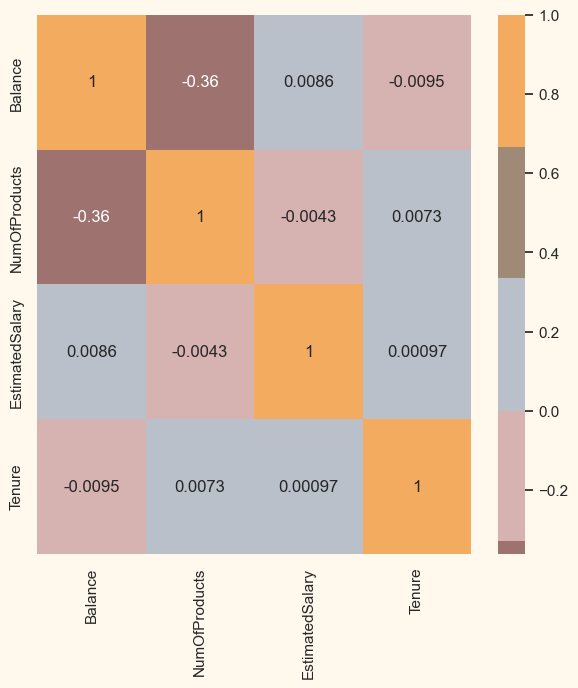

In [9]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(7,7))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [10]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(1, 10))

# fit and transform the data using the scaler
scaled_data = scaler.fit_transform(data)

X = scaled_data

# create a new dataset with the same column names as the original dataset
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [11]:
scaled_data.describe()

,Balance,NumOfProducts,EstimatedSalary,Tenure
count,165034.000000,165034.000000,165034.000000,165034.000000
mean,2.990062,2.663366,6.065830,5.518318
std,2.253341,1.641461,2.263395,2.525543
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,4.358490,3.700000
50%,1.000000,4.000000,6.307646,5.500000
75%,5.302367,4.000000,7.982007,7.300000
max,10.000000,10.000000,10.000000,10.000000


In [12]:
# calculate inertia for a range of number of cluster
# inertia = within cluster sum of squares (WCSS)
inertias = []
for i in range(1, 11):
    print("Fitting the KMeans algorithm with a number of clusters = {0}".format(i))
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(scaled_data)
    inertias.append(km.inertia_)

Fitting the KMeans algorithm with a number of clusters = 1
Fitting the KMeans algorithm with a number of clusters = 2
Fitting the KMeans algorithm with a number of clusters = 3
Fitting the KMeans algorithm with a number of clusters = 4
Fitting the KMeans algorithm with a number of clusters = 5
Fitting the KMeans algorithm with a number of clusters = 6
Fitting the KMeans algorithm with a number of clusters = 7
Fitting the KMeans algorithm with a number of clusters = 8
Fitting the KMeans algorithm with a number of clusters = 9
Fitting the KMeans algorithm with a number of clusters = 10


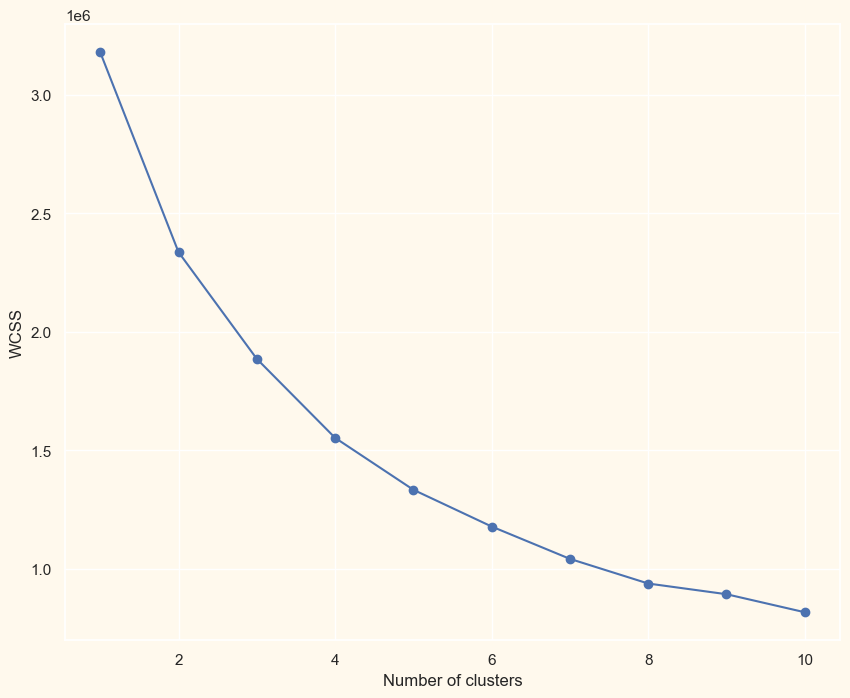

In [13]:
# plot WCSS vs number of clusters
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* based on elbow methode , the number of K is 4 or 5